<a href="https://colab.research.google.com/github/purplepatch-everyday/Projects_in_Python/blob/main/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle Data 분석
- titanic

In [80]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier


Google Drive에 연동하기

In [56]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


titanic data 불러오기

In [63]:
# Directory 변경

train_dir = "/content/drive/MyDrive/personal/Kaggle/titanic/train.csv"
test_dir = "/content/drive/MyDrive/personal/Kaggle/titanic/test.csv"

In [77]:
train_data = pd.read_csv(train_dir)
print(train_data.columns)
train_data.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
test_data = pd.read_csv(test_dir)
print(test_data.columns)
test_data.head()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Null 값 찾기

In [78]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

NaN값 지우기

In [94]:
features = ["Pclass","Sex","Age","SibSp","Embarked"]

In [96]:
train_data_cleaned = train_data.dropna(subset = features)
train_data_cleaned.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52972 (\N{HANGUL SYLLABLE KEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47100 (\N{HANGUL SYLLABLE REOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

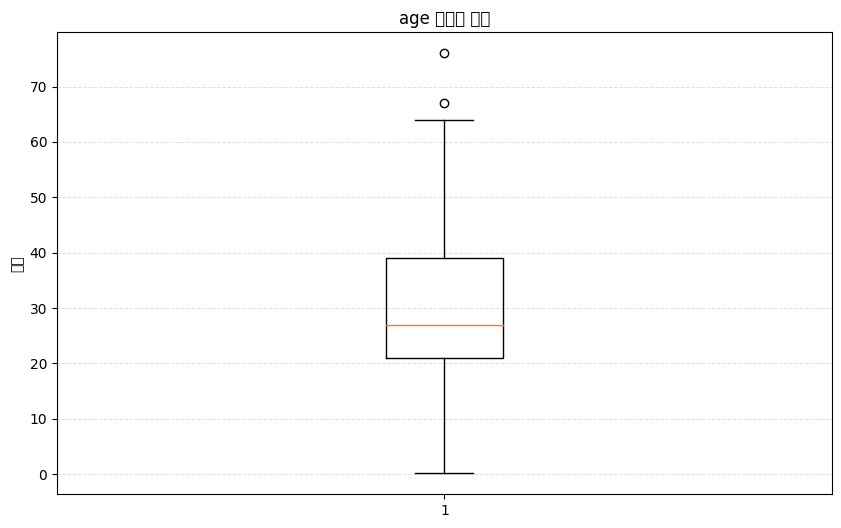

In [120]:
import matplotlib.pyplot as plt

# 박스 플롯으로 age 컬럼 분포 그리기
plt.figure(figsize=(10, 6))
plt.boxplot(test_data["Age"].dropna())  # NaN 값 제거
plt.title("age 컬럼의 분포")
plt.ylabel("나이")
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.4)
plt.show()

In [121]:
median_age = test_data["Age"].dropna().median()
median_age

27.0

In [122]:
test_data["Age"].fillna(median_age, inplace=True)
print(test_data.isna().sum())
print(test_data.shape)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
(418, 11)


모델 만들기
1. Random Forest

1. Random Forest 예측모델

In [123]:
y = train_data_cleaned["Survived"]
features = ["Pclass","Sex","Age","SibSp","Embarked"]
X = pd.get_dummies(train_data_cleaned[features])
X_test = pd.get_dummies(test_data[features])



In [124]:
from sklearn.ensemble import RandomForestClassifier
estimator_num = 300
model = RandomForestClassifier(n_estimators=estimator_num, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, "Survived": predictions})
output.to_csv("submission.csv", index = False)

최종결과: 0.78